<a href="https://colab.research.google.com/github/satya8574/sample-project-docker-2024/blob/master/Day101%20ADVANCE_HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-07-02 02:09:30--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 74.125.201.101, 74.125.201.138, 74.125.201.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-07-02 02:09:30--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-07-02 02:09:30 (18.7 MB/

In [ ]:
df=pd.read_csv('two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [ ]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

## two way anova

model = pg.anova(data=df,dv="Sales",between=['Location','Flavour']  ,ss_type=2)
round(model,4)

,Source,SS,DF,MS,F,p-unc,np2
0,Location,2059.2739,3.0,686.4246,0.3905,0.7601,0.0131
1,Flavour,6919.5590,2.0,3459.7795,1.9685,0.1458,0.0428
2,Location * Flavour,11802.2578,6.0,1967.0430,1.1192,0.3578,0.0709
3,Residual,154669.0163,88.0,1757.6025,NaN,NaN,NaN


In [ ]:
2059.2739	/(2059+6919+11802+154669)

0.011737165216102685

In [ ]:
(df["Sales"].std())**2

1783.0031313131317

In [ ]:
# Each row shows impact of the corresponding source
## first row -> how much of the difference can be explained by location
## second row -> how much of the difference can be explained by flaour
## thrid row -> how much of the difference can be explained by flaour * location
## residual -> there is some other impact apart from these two groups


##  SS: Sum of sqaures -> total variance in response variable
      ## out of total variance of sales 2059 can be attributed to location


## df -> degtee of freedom
## ms -> ss/df

## fstats

## p-unc -> pvalue

## np2 -> partial ets squared -> % contribution

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]
data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

In [ ]:
data1 = np.array(data1)
data2 = np.array(data2)
n1 = len(data1)
n2 = len(data2)
n1, n2

(100, 120)

In [ ]:
KS_stats,p_value=stats.kstest(data1,data2)
KS_stats,p_value

(0.095, 0.671374753605883)

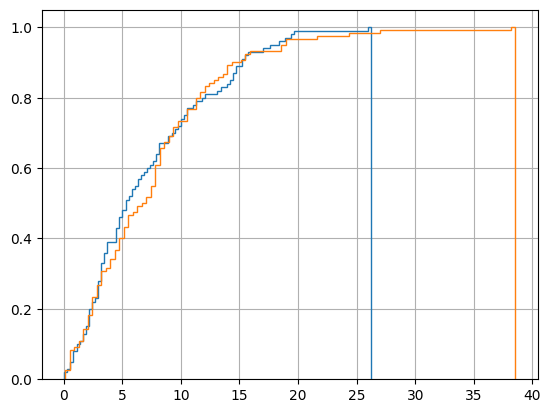

In [ ]:
plt.grid()
a = plt.hist(data1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(data2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
## AB testing

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 -O ab_test_data.csv

--2024-07-02 03:08:59--  https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.google.com (drive.google.com)... 74.125.201.138, 74.125.201.100, 74.125.201.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 [following]
--2024-07-02 03:08:59--  https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 883665 (863K) [application/octet-stream]
Saving to: ‘ab_test_data.csv’

ab_test_data.csv    100%[===================>] 862.95K  --.-KB/s    in 0.01s   

2024-07-02 03:09:00 (82.3 MB

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
ab_test_data = pd.read_csv("ab_test_data.csv")

ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))
## premium user in control

1514

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))
## non premium user in control

8459

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))
## premium user in test

2012

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))
## non premium user in test

7975

In [ ]:
ab_test_data["customer_segmnt"].value_counts()

customer_segmnt
treatment    9987
control      9973
Name: count, dtype: int64

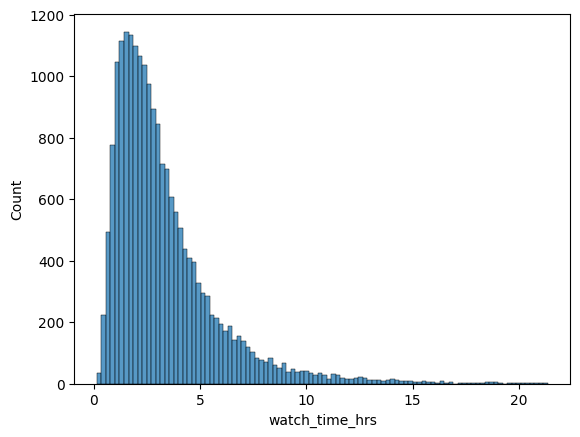

In [ ]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()

In [ ]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()


customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [ ]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [ ]:
ab_test_control_data["watch_time_hrs"].mean() - ab_test_treatment_data["watch_time_hrs"].mean()


0.555666548844524

In [ ]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])

# The two groups are independent
# So, we'll use the method for independent t-test

print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57


In [ ]:
KS_stats,p_value=stats.kstest(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])
KS_stats,p_value

(0.09677857460562564, 4.0112434298563494e-41)